# Lecture 16

- Trade-offs in hypothesis testing
- Goodness-of-fit measures

## Exam 1 Graded

Mean: 68%

The final grade will also be curved.

## Feedback form

- Will figure out a better way to do iPad and Zoom so both are visible.
- Will provide a second practice exam.
- Will try to have more recitations.
- Will take more breaks.

## Last class

* We saw the **Z-test** (known variance)
* We saw the **T-test** (unknown variance)

<div class="alert alert-info">
    <b>Z-Test</b>
    
A Z-test is any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution. Z-tests test the mean of a distribution.

* Let $\hat{\mu}_X$ and $\hat{\mu}_Y$ be the sample means of random samples of sizes $M$ and $N$ from two RVs $X$ and $Y$, respectively, with common variance $\sigma^2$. We can build the statistic:

\begin{align*}
T = \hat{\mu}_X - \hat{\mu}_Y
\end{align*}

where $E[T] = 0$, $\operatorname{Var}[X] = \sigma^2\left(\frac{1}{N} + \frac{1}{M}\right)$ and 

\begin{align*}
T \sim G\left(0, \sigma^2\left(\frac{1}{N} + \frac{1}{M}\right)\right)
\end{align*}

</div>

## T-test

Unknown variance: we have to approximate the variance.

If we use our *unbiased* estimator for the variance, then the distribution of

\begin{align*}
\frac{\hat{\mu}-\mu}{S_{N-1}/\sqrt{N}}
\end{align*}

has a **Student’s $t$-distribution with $N-1$ degrees of freedom (dof)**.

* The density and distribution functions for the **Student's $t$-distribution** are shown on its [Wikipedia page](https://en.wikipedia.org/wiki/Student's_t-distribution).

* Unlike the Gaussian distribution, the distribution function for Student’s t-distribution is in closed form for several values of $\nu$ (degrees of freedom or dof).

In [1]:
import numpy as np
import numpy.random as npr
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

## Today
* We will visualize **trade-offs in hypothesis testing**
* We will look at some **goodness-of-fit measures**

In [2]:
norm = stats.norm() #G(0,1)

t1 = stats.t(1) # student's t-distribution with dof=1
t2 = stats.t(2) # student's t-distribution with dof=2
t5 = stats.t(5)
tnf = stats.t(100_000)

In [3]:
norm.stats('mvsk')

(array(0.), array(1.), array(0.), array(0.))

In [4]:
t1.stats('mvsk')

(array(inf), array(nan), array(nan), array(nan))

In [5]:
t2.stats('mvsk')

(array(0.), array(inf), array(nan), array(nan))

In [6]:
t5.stats('mvsk')

(array(0.), array(1.66666667), array(0.), array(6.))

In [7]:
tnf.stats('mvsk')

(array(0.), array(1.00002), array(0.), array(6.00024001e-05))

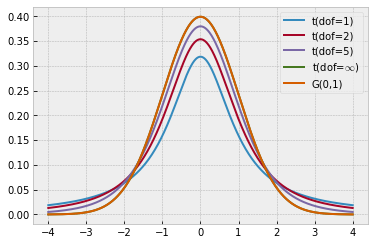

In [8]:
x = np.linspace(-4,4,1000)
plt.plot(x, t1.pdf(x),label='t(dof=1)')
plt.plot(x, t2.pdf(x),label='t(dof=2)')
plt.plot(x, t5.pdf(x),label='t(dof=5)')
plt.plot(x, tnf.pdf(x),label='t(dof=$\infty$)')
plt.plot(x,norm.pdf(x),label='G(0,1)')
plt.legend();

**<font color=blue>Example 1</font> Analytical Test on Difference of Means (T-Test)**

Conduct an **analytical** binary hypothesis test on whether urban and rural populations have different firearms mortality rates.

In [9]:
df = pd.read_csv('firearms-urban.csv')
df

,STATE,RATE-2014,Percent Urban
0,AL,16.9,59.0
1,AK,19.2,66.0
2,AZ,13.5,89.8
3,AR,16.6,56.2
4,CA,7.4,95.0
5,CO,12.2,86.2
6,CT,5.0,88.0
7,DE,11.1,83.3
8,FL,11.5,91.2
9,GA,13.7,75.1


Recall the data "firearms-urban.csv" where the columns of interest for this investigation are:

* **RATE-2014**: The firearms mortality rate by state from 2014. 

* **Percent Urban**: The percentage of the total population in urban areas, from https://www.icip.iastate.edu/tables/population/urban-pct-states. Although this data is 2010, it should be sufficiently accurate for our purposes.

In [10]:
# Use the STATE column as the index

df = df.set_index('STATE')
df

,RATE-2014,Percent Urban
STATE,,
AL,16.9,59.0
AK,19.2,66.0
AZ,13.5,89.8
AR,16.6,56.2
CA,7.4,95.0
CO,12.2,86.2
CT,5.0,88.0
DE,11.1,83.3
FL,11.5,91.2


In [11]:
df.loc['FL']

RATE-2014        11.5
Percent Urban    91.2
Name: FL, dtype: float64

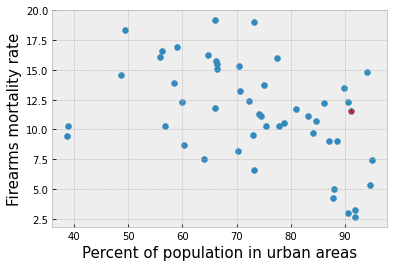

In [12]:
# Plot the data
# Highlight the point for Florida

plt.scatter(df['Percent Urban'],df['RATE-2014'])
plt.scatter(df.loc['FL']['Percent Urban'],df.loc['FL']['RATE-2014'],marker='*',c='r')
plt.xlabel('Percent of population in urban areas',size=15)
plt.ylabel('Firearms mortality rate',size=15);

In [13]:
df['RATE-2014'][df['Percent Urban']<80].shape # rural

(32,)

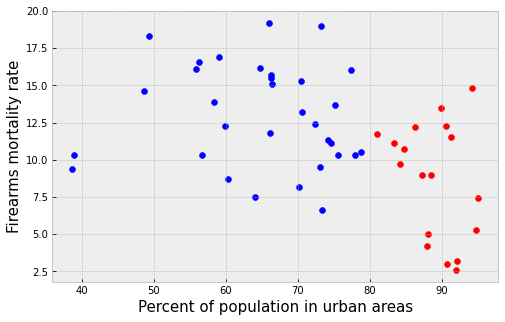

In [14]:
# Let's consider:
# Urban - states with "Percent Urban">=80%
# Rural - states with "Percent Urban"<80%

plt.figure(figsize=(8,5))

plt.scatter(df['Percent Urban'][df['Percent Urban']<80].to_numpy(),df['RATE-2014'][df['Percent Urban']<80],c='b')
plt.scatter(df['Percent Urban'][df['Percent Urban']>=80].to_numpy(),df['RATE-2014'][df['Percent Urban']>=80],c='r')

plt.xlabel('Percent of population in urban areas',size=15)
plt.ylabel('Firearms mortality rate',size=15);

In [15]:
# Let's the firearm mortality rate for 2014 where:
# Urban - states with "Percent Urban">=80%
# Rural - states with "Percent Urban"<80%

# Extract data
urban = df['RATE-2014'][df['Percent Urban']>=80].to_numpy()
rural = df['RATE-2014'][df['Percent Urban']<80].to_numpy()

# Estimate Density using KDE
f_urban = stats.gaussian_kde(urban) # Kernel Density Estimation with Gaussian kernel
f_rural = stats.gaussian_kde(rural)


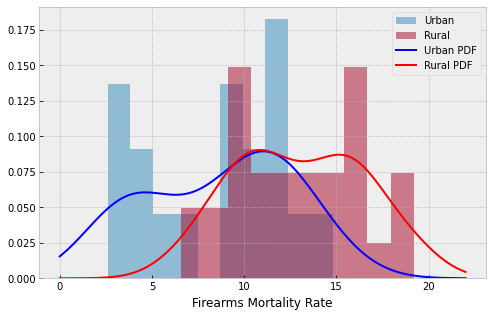

In [16]:
plt.figure(figsize=(8,5))
x = np.linspace(0,22,1000)

plt.hist(urban,alpha = 0.5, label = 'Urban', density = True)
plt.hist(rural,alpha = 0.5, label = 'Rural', density = True)
plt.plot(x,f_urban.pdf(x), 'b', label = 'Urban PDF')
plt.plot(x,f_rural.pdf(x), 'r', label = 'Rural PDF')

plt.legend()
plt.xlabel('Firearms Mortality Rate');

In [17]:
# sample mean for each sample

urban.mean(), rural.mean()

(8.677777777777777, 12.99375)

In [18]:
diff = rural.mean() - urban.mean()
diff

4.315972222222223

* Let's construct a **two-sided binary hypothesis test** using analytical techniques and determine the probability of such a large difference in means under the null hypothesis.

The data comes from a single distribution, which implies same means and same variances.

So, we will use the **T-random variable** to model this. We know: mean of $T$ is 0, and we need to calculate the variance from the data.

In [19]:
pooled = df['RATE-2014']

pooled_mean = pooled.mean()
pooled_mean

11.440000000000003

In [20]:
pooled

STATE
AL    16.9
AK    19.2
AZ    13.5
AR    16.6
CA     7.4
CO    12.2
CT     5.0
DE    11.1
FL    11.5
GA    13.7
HI     2.6
ID    13.2
IL     9.0
IN    12.4
IA     7.5
KS    11.3
KY    13.9
LA    19.0
ME     9.4
MD     9.0
MA     3.2
MI    11.1
MN     6.6
MS    18.3
MO    15.3
MT    16.1
NE     9.5
NV    14.8
NH     8.7
NJ     5.3
NM    16.0
NY     4.2
NC    11.8
ND    12.3
OH    10.3
OK    15.7
OR    11.7
PA    10.5
RI     3.0
SC    15.5
SD    10.3
TN    15.1
TX    10.7
UT    12.3
VT    10.3
VA    10.3
WA     9.7
WV    14.6
WI     8.2
WY    16.2
Name: RATE-2014, dtype: float64

In [21]:
# Sample unbiased estimator for the variance
np.sum((pooled-pooled_mean)**2)/(len(pooled)-1)


17.220408163265304

In [22]:
# Alternative
pooled_var = np.var(pooled,ddof=1) # ddof = delta degrees of freedom

pooled_var


17.22040816326531

In [23]:
# We need to calculate the variance of the difference of sample mean estimators
sm_var = pooled_var*(1/len(urban)+1/len(rural))
sm_var

1.4948270975056694

In [24]:
# Last parameter of T: degrees of freedom
N = len(urban)+len(rural)-1
dof = N -1
dof


48

Calculate the t-distribution and perform the test

In [25]:
myt = stats.t(dof, scale=np.sqrt(sm_var))


# We set the variance of the T random variable here

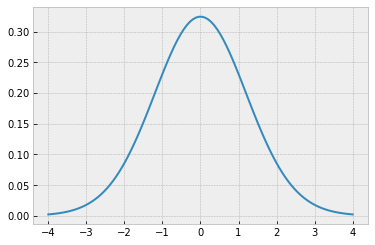

In [26]:
t=np.linspace(-4,4,100)
plt.plot(t,myt.pdf(t));

In [27]:
# 1-sided test

myt.sf(diff)


0.000463991896118919

In [28]:
# 2-sided test

2*myt.sf(diff)


0.000927983792237838

In [29]:
# other 1-sided

myt.cdf(-diff)


0.000463991896118919

**Conclusion:** 

The p-value is much smaller than $\alpha=0.01$, therefore we REJECT the null hypothesis that the means of the populations for urban firearms mortality rate and rural firearms mortality rate are the same.

___

**<font color=blue>Example 2</font>** Use the Student's $T$ random variable to determine a 95% confidence interval for the mean difference under the null hypothesis. Is the resulting confidence interval compatible with the observed difference of means?

*Hint:* The inverse CDF function in ```scipy.stats``` is called the Percent point function (PPF) and is given by the ```ppf``` method of random variable objects.

<!-- The 95% confidence interval is the interval $[a,b]$ for which $P(T \le a) =0.025$ and $P(T\ge b) = 0.025$

Thus
$P(T \le a) = F_T(a) =0.025$, which is satisfied if $a = F_{T}^{-1}(0.025)$

Similarly,
$P(T \leq b) = 0.975$ and $P(T \ge b) = 1 - F_T(b) +P(T=b) =1- F_T(b) =0.025$, which is satisfied if 
$b= F_{T}^{-1}(0.975)$

Thus, the 95% confidence interval is: -->

In [30]:
myt = stats.t(dof,scale = np.sqrt(sm_var))

In [31]:
myt.ppf(0.025) # a

-2.4582648209603426

In [32]:
myt.ppf(0.975) # b

2.4582648209603417

In [33]:
diff

4.315972222222223

**Conclusion:**

<!-- Since the 95% confidence interval does not contain the observed mean difference, we say it is not compatible with the assumption that this data comes from the same distribution (in particular, it is incompatible with even the means of the distributions being equal). Therefore this is a statistically significant event, therefore we reject the null hypothesis. -->

Since 4.32 is not within the 95% confidence interval, we can reject our null hypothesis with a 95% confidence.

# Errors and Performance Tradeoffs in Hypothesis Testing

* In binary hypothesis testing, there are two types of errors:

    1. **False Alarm** (Type I Error, also called *False Positive*)
        * occurs if we accept the alternate hypothesis ($H_1$), when it is not true; or reject the null hypothesis when it is in fact true.
        * we will use the notation
        \begin{align*}
        P_{fa} = P(\text{false alarm})
        \end{align*}
    
    2. **Miss** (Type II Error, also called *False Negative*)
        * occurs if we reject a hypothesis when it is actually true
        * we will use the notation
        \begin{align*}
        P_m = P(\text{miss})
        \end{align*}

* When performing a hypothesis test, there is always a tradeoff between these two types of errors

* The tradeoff is controlled by choosing the significance level, $\alpha$, to which the p-value is compared with
    * the value $\alpha$ is the probability that we will reject the null hypothesis, $H_0$ when it is in fact true
    * equivalently, it is the probability of accepting the alternative hypothesis, $H_1$, when $H_1$ is false
    
* Even though the binary hypothesis test is usually conducted under the assumptions of $H_0$, we are usually conducting it to determine whether $H_1$ is the cause of the observed difference
    * thus, we will consider the implications with respect to $H_1$ when labeling errors
    * so for the case that we accept $H_1$ when it is false, we call that a **false alarm/Type I error**
    * then $P_{fa} = \alpha$
    
* Note that if we decrease $\alpha$, then we decrease $P_{fa}$, but we also decide that the null hypothesis could be true when it is in fact false
    * i.e., we increase the **Probability of Miss/Type II error**, $P_m$

* The converse is also true.

# Binary Decisions from Continuous Data

* We have many situations where we have a continuous measurement that depends on some underlying binary phenomena.

* For example, we may wish to determine the presence of a disease based on the measurement of some chemical
     * Then the distribution of the data depends on whether the disease is present or not.
     
* More generally, we assume the data comes from one of two continuous densities, $f_0(x|H_0)$ or $f_1(x|H_1)$, and we wish to make a decision between $H_0$ and $H_1$ based on an observed value $x$

* We will choose $H_i$ if $x\in R_i$, where $R_0$, $R_1$ are partitions of the real line

* The probability of false alarm and probability of miss then depend on the decision regions $R_0$ and $R_1$

* In many cases, the decision regions are determined by a single threhold $\gamma$, like $R_0 = x < \gamma$ and $R_1 = x > \gamma$

___

**<font color=blue>Example 1</font>**
The PSA (Prostate-Specific Antigen) values for men in their 60s without cancer are approximately Gaussian(2,$\sigma^2=1$). The PSA values for men in their 60s with cancer are approximately Gaussian(4,$\sigma^2=2$).

In [34]:
def drawMAP(p0): 
    # Setup RVs
    
    # p0 = prior probability of a man in his 60s to not have prostate cancer
    
    # Set up the RVs
    G0 = stats.norm(loc = 2, scale = np.sqrt(1)) # Distribution under H0
    G1 = stats.norm(loc = 4, scale = np.sqrt(2)) # Distribution under H1
    
    x=np.linspace(-1,8,1001)
    p1=1-p0 # prior probability (p0 is given)
        
    # plot the weighted densities:
    # these are proportional to the APPs
    plt.plot(x,p0*G0.pdf(x),label='$f_X(x|H_0)P(H_0)$')
    plt.plot(x,p1*G1.pdf(x),label='$f_X(x|H_1)P(H_1)$')
    
    # Determine the regions where the APP for 0 is 
    # bigger and the APP for 1 is bigger
    R0=x[np.where(p0*G0.pdf(x)>= p1*G1.pdf(x))]
    R1=x[np.where(p0*G0.pdf(x)< p1*G1.pdf(x))]

    # Fill under the regions found above
    plt.fill_between(R0,p0*G0.pdf(R0),alpha=0.3,label='Decide $H_0$')
    plt.fill_between(R1,p1*G1.pdf(R1),alpha=0.3,label='Decide $H_1$')
    plt.legend()
    
    # Print the MAP threshold
    print('Reject the Null Hypothesis H0 if PSA is >',round(R1[0],2))

Reject the Null Hypothesis H0 if PSA is > 3.07


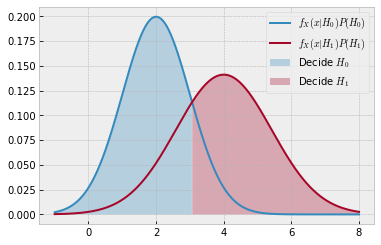

In [35]:
drawMAP(0.5)

Reject the Null Hypothesis H0 if PSA is > 3.58


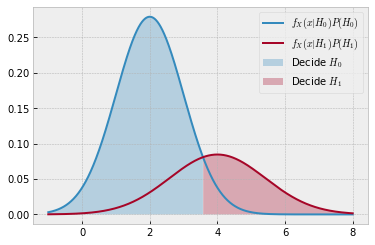

In [36]:
drawMAP(0.7)

1. For $P_{fa} = 10$%, find $P_m$
    
<!-- \begin{align*}
P_{fa} &= 0.1 \\
Q\left(\frac{\gamma-2}{\sqrt{\sigma^2}}\right) &= 0.1 \\
Q\left(\frac{\gamma-2}{\sqrt{1}}\right) &= 0.1 \\
\gamma - 2 &= Q^{-1}(0.1) \\
\gamma - 2 &= 1.28 \\
\gamma &\approx 3.28
\end{align*}

\begin{align*}
P_m = Q\left(\frac{4 - 3.28}{\sqrt{2}}\right) \approx 0.305
\end{align*} -->

2. For $P_m = 10$%, find $P_{fa}$

<!-- \begin{align*}
P_m &= 0.1 \\
Q\left(\frac{4 - \gamma}{\sqrt{2}}\right) &= 0.1 \\
\frac{4-\gamma}{\sqrt{2}} &\approx 1.28\\
\gamma &\approx 2.19
\end{align*}

\begin{align*}
P_{fa} = Q\left(\frac{2 - 2.19}{1}\right) \approx 0.425
\end{align*} -->

___

# Visualizing Tradeoffs in Hypothesis Testing: ROC Curves

* We can visualize the relation between these types of errors using a ROC curve
    * ROC stands for *receiver operating characteristic*
    * ROC curves were developed for RADAR systems but are widely used in fields of statistical tests, such as biomedicine

* In ROC curves, we do not plot $P_{fa}$ vs $P_m$

* Instead:
    * the x-axis is **FPR (false positive rate)**
    \begin{align*}
    \text{FPR}=P_{fa}
    \end{align*}
    
    * the y-axis is **TPR (true positive rate)**
    \begin{align*}
    \text{TPR}=1-P_m
    \end{align*}

In [37]:
def q(x):
    return stats.norm.sf(x)

In [49]:
fpr = []
tpr = []

for gamma in np.linspace(0,6,100):
    fpr += [q((gamma - 2)/np.sqrt(1))]
    tpr += [1-q((4-gamma)/np.sqrt(2))]

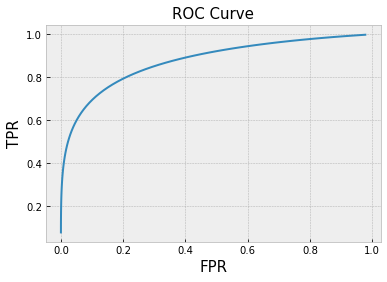

In [50]:
plt.plot(fpr, tpr)
plt.xlabel('FPR',size = 15)
plt.ylabel('TPR',size = 15)
plt.title('ROC Curve', size = 15);

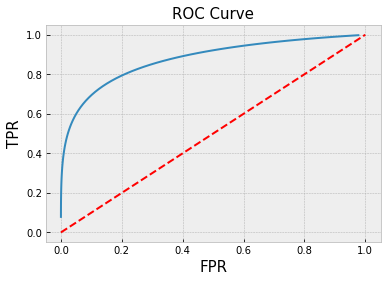

In [51]:
ref = np.linspace(0,1,50)
plt.plot(fpr, tpr)
plt.plot(ref,ref,'--r')
plt.xlabel('FPR',size = 15)
plt.ylabel('TPR',size = 15)
plt.title('ROC Curve', size = 15);

## Area Under the Curve (AUC)

*Area Under Curve (AUC)* is a common measure of how good a test is. It is simply the area under the ROC curve. Random guessing can achieve the diagonal line, so the minimum AUC is 1/2. The maximum AUC is 1, which is achieved by a test that is always right; the ROC curve is along the left and top axes.

In [52]:
from sklearn.metrics import auc

In [53]:
auc(fpr,tpr)

0.8531211502972987

**<font color=blue>Example 2</font>** Plot the performance if the variance of each PSA test is reduced by a factor of 4. What is the AUC?

In [54]:
fpr_ex2 = []
tpr_ex2 = []

for gamma in np.linspace(0,6,100):
    fpr_ex2 += [q((gamma - 2)/np.sqrt(1/4))]
    tpr_ex2 += [1-q((4-gamma)/np.sqrt(2/4))]
    

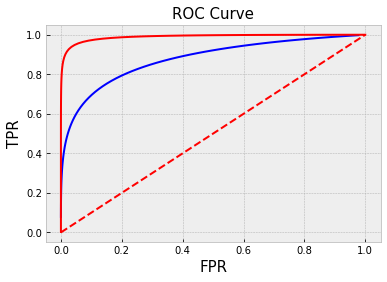

In [55]:
plt.plot(fpr,tpr, '-b'); 
plt.plot(fpr_ex2,tpr_ex2, '-r'); 
plt.plot(ref,ref,'--r')
plt.xlabel('FPR',size = 15)
plt.ylabel('TPR',size = 15)
plt.title('ROC Curve', size = 15);

In [56]:
auc(fpr_ex2,tpr_ex2)

0.9894553783471083

In [61]:
fpr_ex3 = []
tpr_ex3 = []

for gamma in np.linspace(0,6,100):
    fpr_ex3 += [q((gamma - 1)/np.sqrt(1))]
    tpr_ex3 += [1-q((6-gamma)/np.sqrt(2))]
    

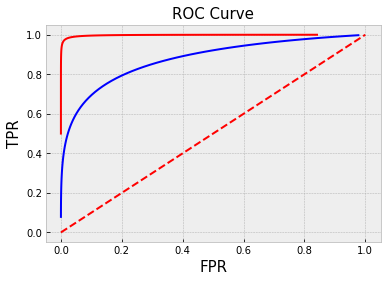

In [62]:
plt.plot(fpr,tpr, '-b'); 
plt.plot(fpr_ex3,tpr_ex3, '-r'); 
plt.plot(ref,ref,'--r')
plt.xlabel('FPR',size = 15)
plt.ylabel('TPR',size = 15)
plt.title('ROC Curve', size = 15);

___

# Testing Goodness-of-Fit

The goodness of fit of a statistical model describes how well it fits a set of observations. Measures of goodness of fit typically summarize the discrepancy between observed values and the values expected under the model in question.

## Testing Whether Data Comes from a Distribution: Discrete Distributions

* Given a set of random data and a proposed model, how could we determine if the data could have reasonably come from that model?

* For example, given values from a six-sided die, how could you tell if the die is fair? 

#### <font color=blue>Example 3</font>

In [63]:
# Draw 60 values from a fair 6-sided die:
dice = npr.randint(1,7,size = 60)

dice


array([5, 4, 5, 5, 4, 1, 3, 5, 3, 1, 3, 3, 5, 2, 1, 5, 3, 6, 2, 1, 3, 3,
       2, 1, 5, 5, 3, 4, 3, 1, 3, 6, 4, 3, 3, 3, 3, 6, 3, 6, 3, 4, 5, 4,
       6, 2, 2, 4, 4, 3, 1, 1, 3, 1, 2, 6, 2, 1, 3, 1])

In [64]:
vals, counts = np.unique(dice,return_counts = True)

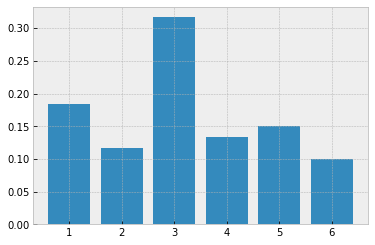

In [66]:
plt.bar(vals, counts/60);

* Even after 60 rolls, the numbers still vary significantly

* We could compare them to the expected values:

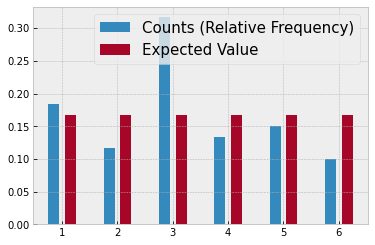

In [70]:
plt.bar(vals-0.15, counts/60, width=0.2, label = 'Counts (Relative Frequency)');
plt.bar(vals+0.15, [1/6], width=0.2, label = 'Expected Value');
plt.legend(fontsize=15);

#### <font color=blue>Example 4</font>

The file "baseball.pickle" contains the birth months of major league baseball players.

> [```pickle```](https://docs.python.org/3/library/pickle.html) is a Python object serialization library.

In [71]:
import pickle

In [72]:
pf = open('baseball.pickle','rb')

In [73]:
df = pickle.load(pf)

In [74]:
pf.close()

In [75]:
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
num_players,1398.0,1213.0,1350.0,1221.0,1229.0,1157.0,1317.0,1558.0,1382.0,1526.0,1406.0,1350.0


In [76]:
baseball = df.loc['num_players'].to_numpy()
baseball

array([1398., 1213., 1350., 1221., 1229., 1157., 1317., 1558., 1382.,
       1526., 1406., 1350.])

In [78]:
months = df.columns.to_numpy()
print(months)

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


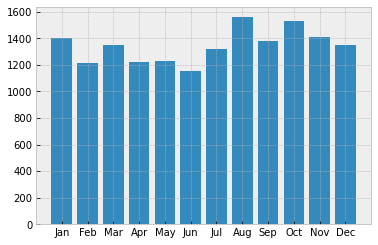

In [80]:
plt.bar(months, baseball);

Observations and Comments:

* Note that more MLB players are born in August than any other month

* Some people claim that this is because in little league baseball through 2006, the cutoff for determing a player's age eligibility was July 31st

* That is, a player who was turning 9 that year would not be eligible to play in the 8 & Under league if their birthday was before August 1st. 

* Thus, players with July birthdays were the youngest (and, on average, smallest) in their leagues, and player with August birthdays were the oldest (and, on average, largest)